In [110]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [111]:
model_uri = '../modelh5/model_rnn_nontuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 101, 64)           4224      
                                                                 
 dense_28 (Dense)            (None, 101, 32)           2080      
                                                                 
 flatten_7 (Flatten)         (None, 3232)              0         
                                                                 
 dense_29 (Dense)            (None, 64)                206912    
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                      

In [112]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()
file = open('testing.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [113]:
dataset_path = '../data/testing_10/'

In [114]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                to_append = f'{file_path}'
                # print(file_path)
                y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
                coeffs = wavedec(y, 'db1', level=10)
                cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
                mfcc = librosa.feature.mfcc(y=cD5, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
                rms = librosa.feature.rms(y=cD5)[0]
                cqt = np.abs(librosa.cqt(y=cD5, sr=sr, n_bins=60)) 
                combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
                to_append = f'{file_path}'
                for e in combined_features:
                    to_append += f' {np.mean(e.T, axis=0)}'
                to_append += f' {semantic_label}'
                file = open('testing.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())





Processing: MVP


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=551
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=276
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=138
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=69
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=35
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input 


Processing: MS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=354
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=177
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=89
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=45
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=500
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input s


Processing: N


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=592
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=296
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=148
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=74
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=37
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input 


Processing: MR


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=288
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=144
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=72
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=488
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=488
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input 


Processing: AS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=297
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=149
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=654
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=327
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=653
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for inp

In [115]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-9.541395,-91.143021,28.903170,-28.815067,14.790125,-1.274508,7.200133,-0.800985,-0.509661,...,0.044082,0.042634,0.043194,0.036649,0.043482,0.056047,0.069611,0.042223,0.028018,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,40.801559,-63.870552,38.933266,1.560764,0.938861,1.462014,4.713227,1.602592,-0.816292,...,0.073729,0.056661,0.072613,0.077885,0.068186,0.063345,0.068280,0.080829,0.090485,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-19.247021,-13.253156,2.126772,-15.871796,5.826499,1.066290,-2.810425,-0.621866,0.539523,...,0.041389,0.073307,0.093646,0.081886,0.081877,0.081423,0.079035,0.063651,0.035900,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-13.665171,-75.638847,30.760571,-22.779495,9.310810,-11.586582,-0.196526,-1.581829,-2.511322,...,0.037675,0.030876,0.027545,0.042091,0.046824,0.046481,0.035847,0.021838,0.014756,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,34.417572,-34.021080,48.826878,-7.069368,-31.906717,23.181713,-18.613308,10.914560,-3.484826,...,0.136596,0.202013,0.179694,0.205573,0.211106,0.155557,0.107766,0.117783,0.128389,MVP


In [116]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 6ms/step
===
[0.23434062 0.21400343 0.17741683 0.29980403 0.07443507]
Actual class: 3
Predicted class: MVP
===
===
[0.17194535 0.20318702 0.19494058 0.2435051  0.18642189]
Actual class: 3
Predicted class: MVP
===
===
[0.19761494 0.16006769 0.18545836 0.3543156  0.10254327]
Actual class: 3
Predicted class: MVP
===
===
[0.27766752 0.2458909  0.18749718 0.17735365 0.11159071]
Actual class: 0
Predicted class: AS
===
===
[0.16069451 0.16883463 0.13247752 0.4426983  0.09529509]
Actual class: 3
Predicted class: MVP
===
===
[0.20879248 0.22081241 0.20741625 0.222408   0.1405709 ]
Actual class: 3
Predicted class: MVP
===
===
[0.15692537 0.19667038 0.11470876 0.41772068 0.11397486]
Actual class: 3
Predicted class: MVP
===
===
[0.16822024 0.18337066 0.21849243 0.31067175 0.11924488]
Actual class: 3
Predicted class: MVP
===
===
[0.18386625 0.17328815 0.177723   0.36116508 0.10395744]
Actual class: 3
Predicted class: MVP
===
===
[0.1673072  0.17347696 0.125

In [118]:
cm = confusion_matrix(y, hasil)
cm

array([[ 1,  1,  0, 18,  0],
       [ 0,  0,  0, 20,  0],
       [ 0,  3,  0, 17,  0],
       [ 1,  0,  0, 18,  1],
       [ 0,  0,  0, 20,  0]])

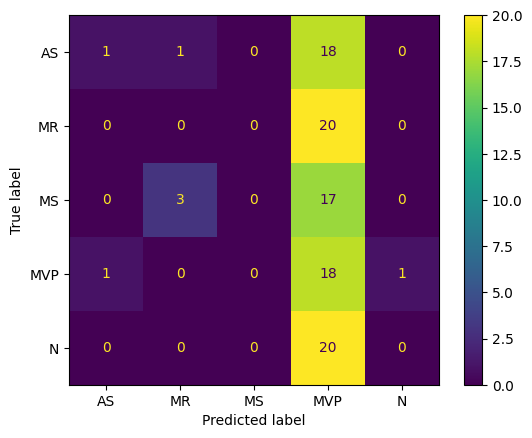

In [119]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [120]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

/tmp/ipykernel_2729/1806418818.py:11: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
/tmp/ipykernel_2729/1806418818.py:19: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)


In [121]:
print("TNR :" , TNR)
print("TPR :" , TPR)
print("FPR :" , FPR)
print("FNR :" , FNR)
print("ACC :" , ACC)
print("PPV :" , PPV)
print("NPV :" , NPV)
print("FDR :" , FDR)


TNR : [0.9875 0.95   1.     0.0625 0.9875]
TPR : [0.05 0.   0.   0.9  0.  ]
FPR : [0.0125 0.05   0.     0.9375 0.0125]
FNR : [0.95 1.   1.   0.1  1.  ]
ACC : [0.8  0.76 0.8  0.23 0.79]
PPV : [0.5        0.                nan 0.19354839 0.        ]
NPV : [0.80612245 0.79166667 0.8        0.71428571 0.7979798 ]
FDR : [0.5        1.                nan 0.80645161 1.        ]
